In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#IMPORTANDO FEATURES

In [ ]:
import pandas as pd

features = ['ID', 'TOTAL_RESPONSE_TIME', 'YEARLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS', 'RT_PUNISHED_ORDERS', 'PERMANENT_BLOCK', 'CHURN']

target = 'CHURN'

dataframe = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/Derivações/churn_all_columns.csv')

dataframe = dataframe.drop(dataframe.columns.difference(features), 1)

dataframe.replace({True: 1, False: 0}, inplace = True)

display(dataframe)

x = dataframe.drop(target, axis=1)

y = dataframe[target]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,ID,TOTAL_RESPONSE_TIME,PERMANENT_BLOCK,RT_PUNISHED_ORDERS,CHURN,TOTAL_ORDERS,ORDERS_DONE_RATE,YEARLY_EARNINGS,DISTANCE_PER_ORDER
0,1286316,3769249.0,0,44.0,1,1091.0,0.955087,12936.28,3.446071
1,1110698,5043094.0,0,2.0,1,0.0,0.000000,55.56,1.435829
2,284886,0.0,0,0.0,1,27.0,1.000000,106.84,3.125364
3,1036587,14408076.0,0,19.0,1,190.0,0.942105,2016.36,3.386037
4,106854,472084.0,0,9.0,1,132.0,0.931818,140.13,2.870784
...,...,...,...,...,...,...,...,...,...
204184,33249,0.0,0,2.0,0,1251.0,0.947242,0.00,6.697244
204185,33203,0.0,0,22.0,0,355.0,0.952113,2281.96,2.136435
204186,33194,0.0,0,24.0,0,3251.0,0.984620,42610.58,3.796884
204187,33161,0.0,0,31.0,0,2684.0,0.978018,9534.77,3.792348


#SEPARANDO E NORMALIZANDO

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

##NORMALIZANDO COM MINMAX()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[['TOTAL_RESPONSE_TIME', 'YEARLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS', 'RT_PUNISHED_ORDERS']] = scaler.fit_transform(x_train[['TOTAL_RESPONSE_TIME', 'YEARLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS', 'RT_PUNISHED_ORDERS']])

x_test[['TOTAL_RESPONSE_TIME', 'YEARLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS', 'RT_PUNISHED_ORDERS']] = scaler.transform(x_test[['TOTAL_RESPONSE_TIME', 'YEARLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE_RATE', 'TOTAL_ORDERS', 'RT_PUNISHED_ORDERS']])

#BALANCEANDO

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

ENN = RandomUnderSampler()
x_enn_train, y_enn_train = ENN.fit_resample(x_train, y_train)

#MÉTRICAS

In [ ]:
def metricas_enn(modelo):
  from sklearn.metrics import recall_score, precision_score, f1_score
  print('Acuracidade (treino): ', modelo.score(x_enn_train, y_enn_train))
  print('Acuracidade (teste): ', modelo.score(x_test, y_test))
  print('Revocação: ', recall_score(y_test, y_pred))
  print('Precisão: ', precision_score(y_test, y_pred))
  print('F1_score: ', f1_score(y_test, y_pred))

#MODELO

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

xg=xgboost.XGBClassifier()

grid = RandomizedSearchCV(xg, param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

xgmodel = grid.fit(x_enn_train, y_enn_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
y_pred = xgmodel.predict(x_test)
metricas_enn(xgmodel)

Acuracidade (treino):  0.9856997525567898
Acuracidade (teste):  0.982821740407744
Revocação:  0.9201130909330002
Precisão:  0.9734505066431701
F1_score:  0.9460306014376817


In [ ]:
xgmodel.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=8)

In [ ]:
pd.DataFrame(x_train)

,ID,TOTAL_RESPONSE_TIME,PERMANENT_BLOCK,RT_PUNISHED_ORDERS,TOTAL_ORDERS,ORDERS_DONE_RATE,YEARLY_EARNINGS,DISTANCE_PER_ORDER
40391,493272,0.003660,0,0.080420,0.013421,0.812500,0.002536,0.001360
66499,683305,0.000054,0,0.003497,0.081996,0.975703,0.001307,0.002338
84857,328683,0.000087,0,0.000000,0.000210,1.000000,0.000046,0.002549
150077,1113540,0.000000,0,0.000000,0.000105,1.000000,0.000024,0.000847
183866,1052279,0.000000,0,0.024476,0.021076,0.975124,0.007630,0.002662
...,...,...,...,...,...,...,...,...
73349,1145052,0.000018,0,0.010490,0.000000,0.000000,0.000000,0.000000
109259,1391521,0.000000,0,0.000000,0.000524,1.000000,0.000095,0.001761
50057,570548,0.000768,0,0.000000,0.198700,0.966755,0.000128,0.001575
5192,956645,0.001533,0,0.080420,0.039425,0.978723,0.012201,0.001677


In [ ]:
import xgboost
xgmodel = xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=8)
xgmodel = xgmodel.fit(x_enn_train, y_enn_train)

In [ ]:
metricas_enn(xgmodel)

Acuracidade (treino):  0.9288977569836246
Acuracidade (teste):  0.921804854955352
Revocação:  0.9201130909330002
Precisão:  0.9734505066431701
F1_score:  0.9460306014376817


##Matriz de confusão

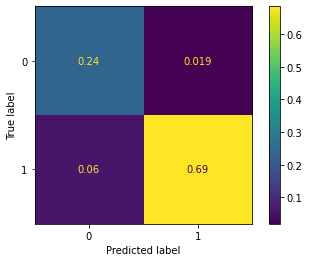

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize = 'all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgmodel.classes_)
disp.plot()
plt.show()

##Features importances

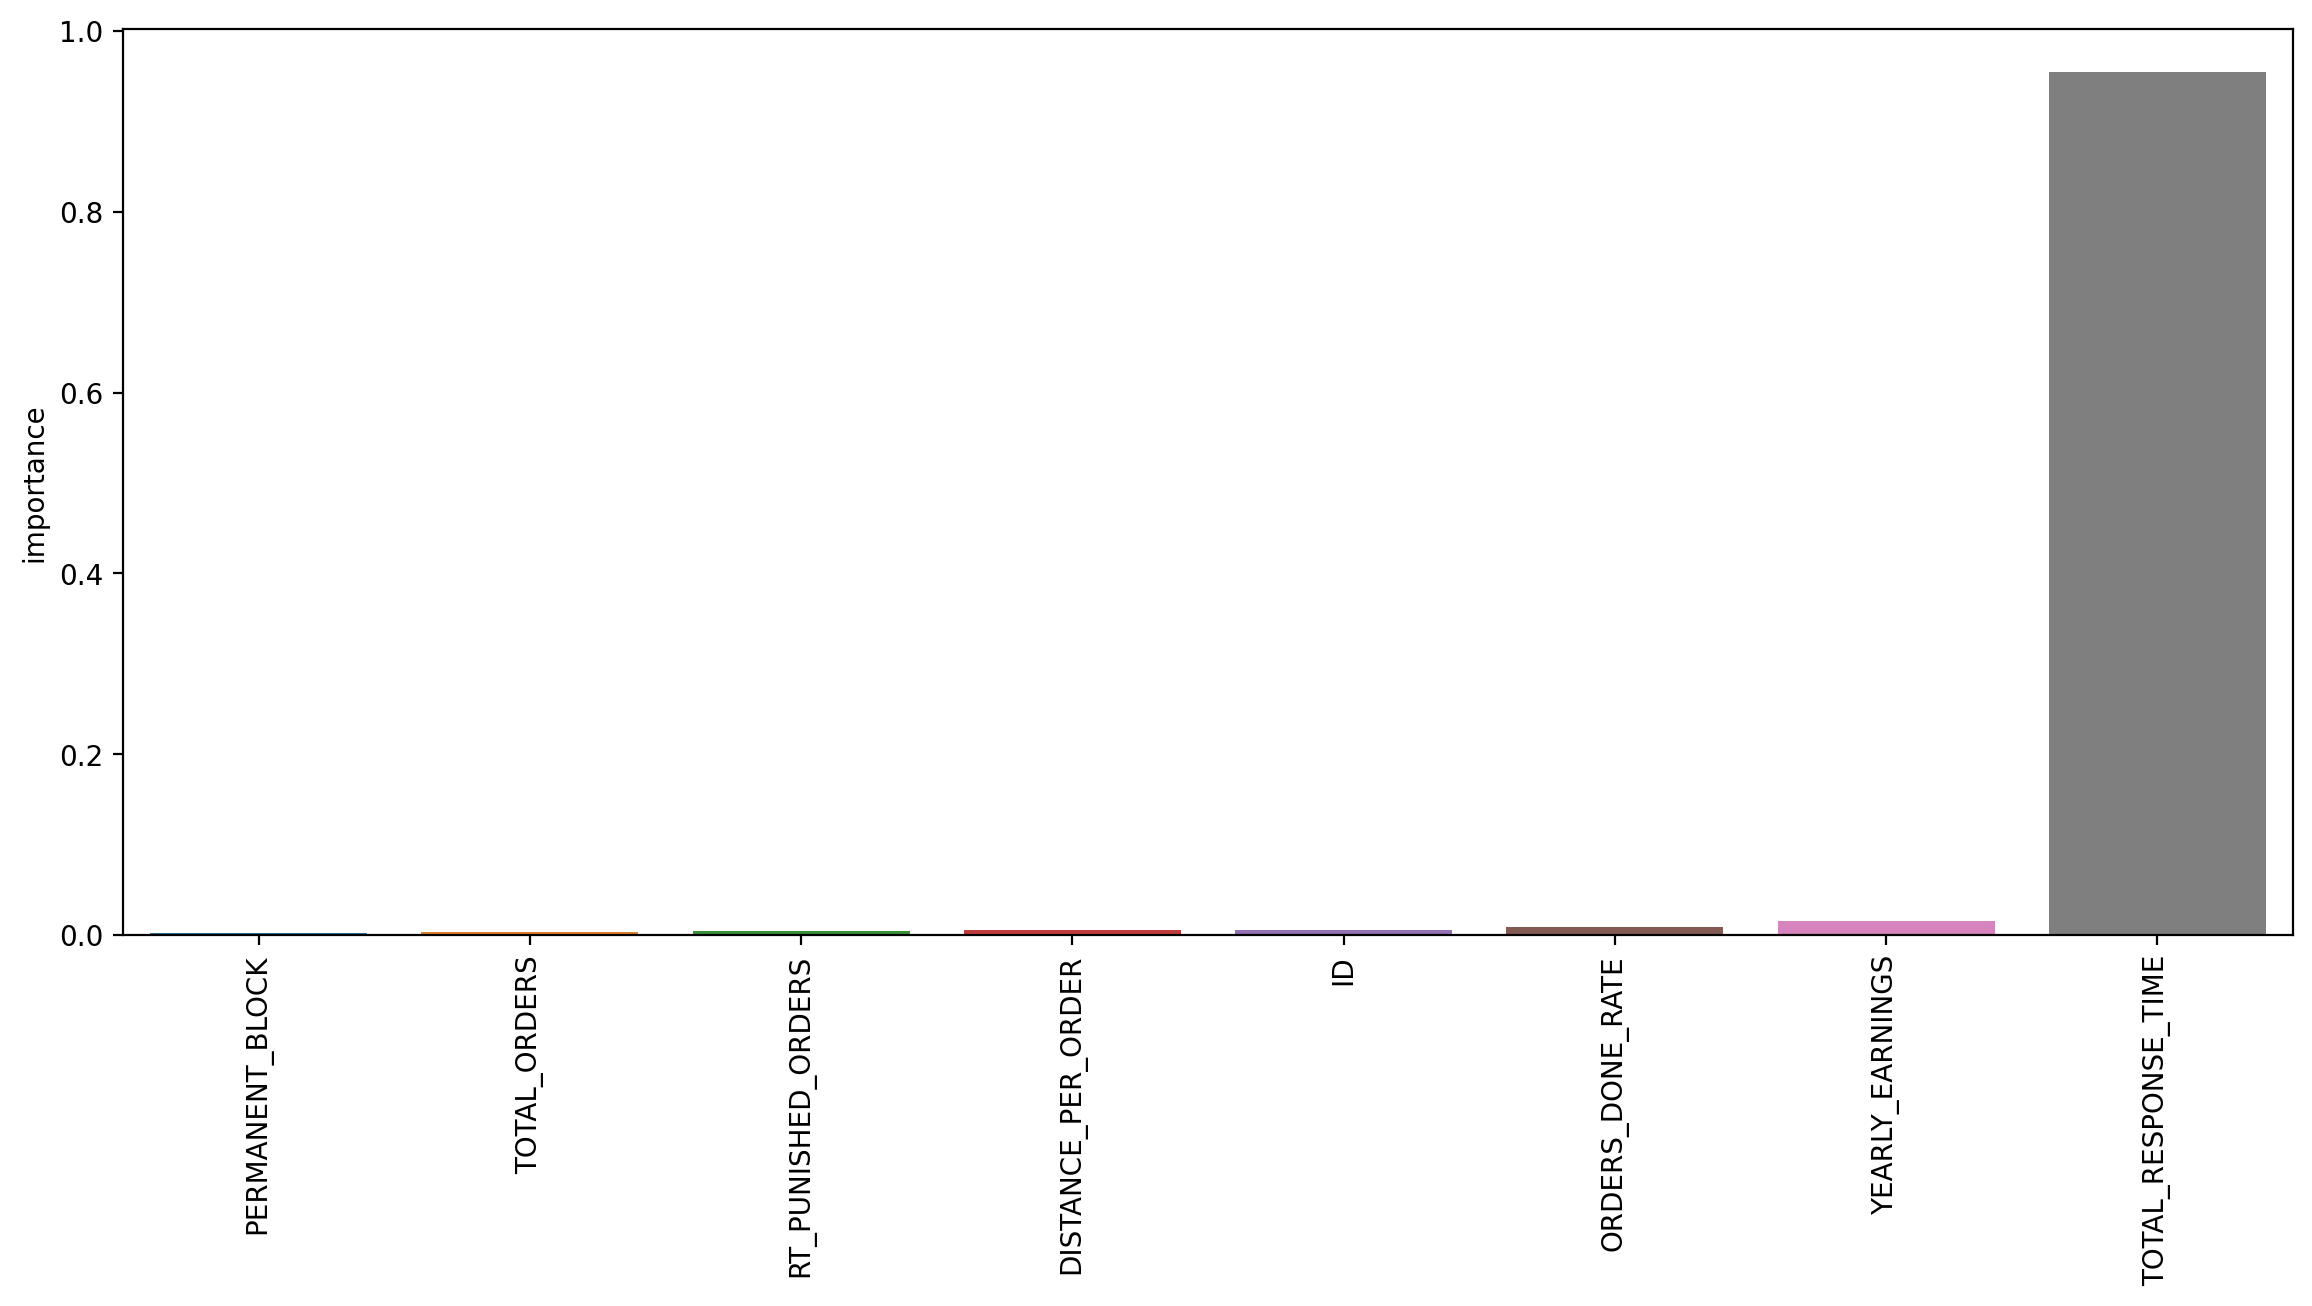

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

xgmodel.feature_importances_
feats = pd.DataFrame(index=x.columns, data= xgmodel.feature_importances_, columns=['importance'])
imp_feats = feats[feats['importance'] > 0]
imp_feats = imp_feats.sort_values('importance')

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('importance'),x=imp_feats.sort_values('importance').index,y='importance')
plt.xticks(rotation=90);

#LOAD MODELO E NORMALIZAÇÃO

In [ ]:
from joblib import dump

dump(xgmodel, '/content/drive/Shareddrives/Grupo Rappitendeiros/Derivações/modeloxg.model')
dump(scaler,'/content/drive/Shareddrives/Grupo Rappitendeiros/Derivações/scaler.scaler')

['/content/drive/Shareddrives/Grupo Rappitendeiros/Derivações/scaler.scaler']

In [ ]:
dataframe['YEARLY_EARNINGS'].max(
    
)

271757.48